## Analyze the shopping trend dataset by answering the questions below.
> **IMPORTANT** write your insights after each question

# Read the data

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "shopping_trends_updated.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/customer-shopping-trends-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

/tmp/ipython-input-1162196871.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'customer-shopping-trends-dataset' dataset.


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Question 1
What is the distribution of `Purchase Amount (USD)` for different `Subscription Status` values?
- Plot using both **Seaborn’s `boxplot` and Matplotlib’s histogram**.
- Are there any outliers?

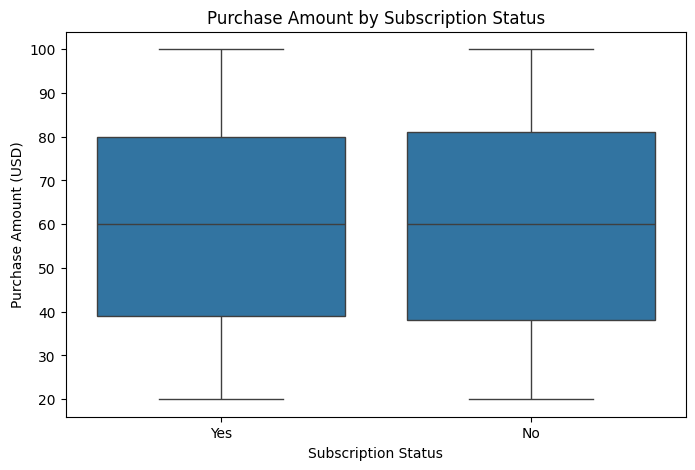

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Subscription Status',y='Purchase Amount (USD)',data=df)
plt.title('Purchase Amount by Subscription Status')
plt.show()

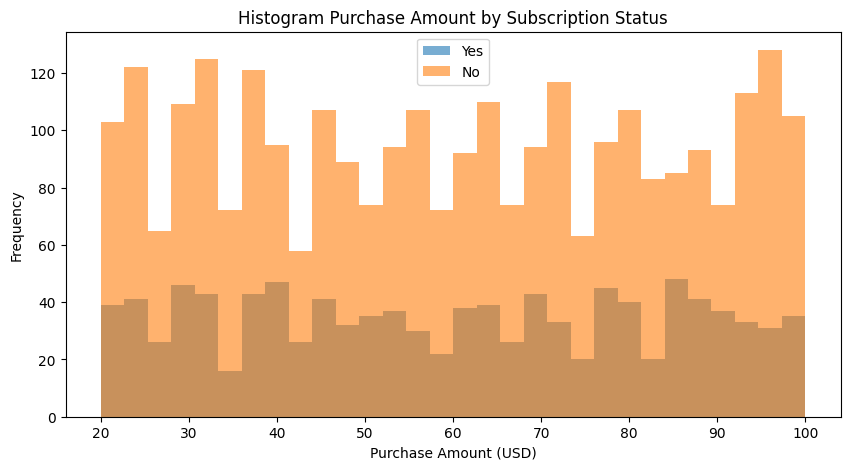

In [ ]:
plt.figure(figsize=(10, 5))
for status in df['Subscription Status'].unique():
    subset = df[df['Subscription Status'] == status]
    plt.hist(subset['Purchase Amount (USD)'],bins=30,alpha=0.6,label=status)
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.title('Histogram Purchase Amount by Subscription Status')
plt.legend()
plt.show()

### insights
- What distribution?

  **uniform distribution** range 20 to 100

- No obvious outlier show in Both yes or no

### Question 2
Compare the frequency of each `Payment Method` across the dataset **from highest to lowest** .
- Use both **Seaborn's `countplot`** and **Matplotlib's bar plot**.

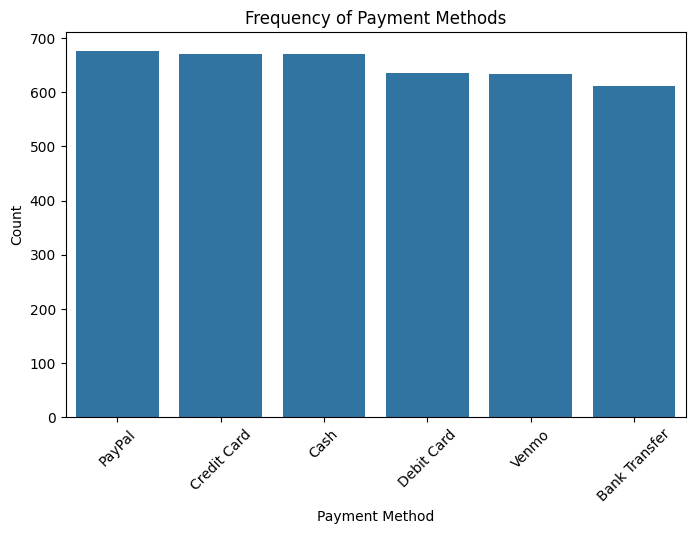

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Payment Method',data=df,order=df['Payment Method'].value_counts().index)
plt.title('Frequency of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### insights
- All payment Method are approx equal

### Question 3
Show the number of purchases made by each `Gender` in each `Season`.
- Create a **grouped bar chart/ Pie chart using Matplotlib**.
- Also plot a **stacked countplot using Seaborn**.

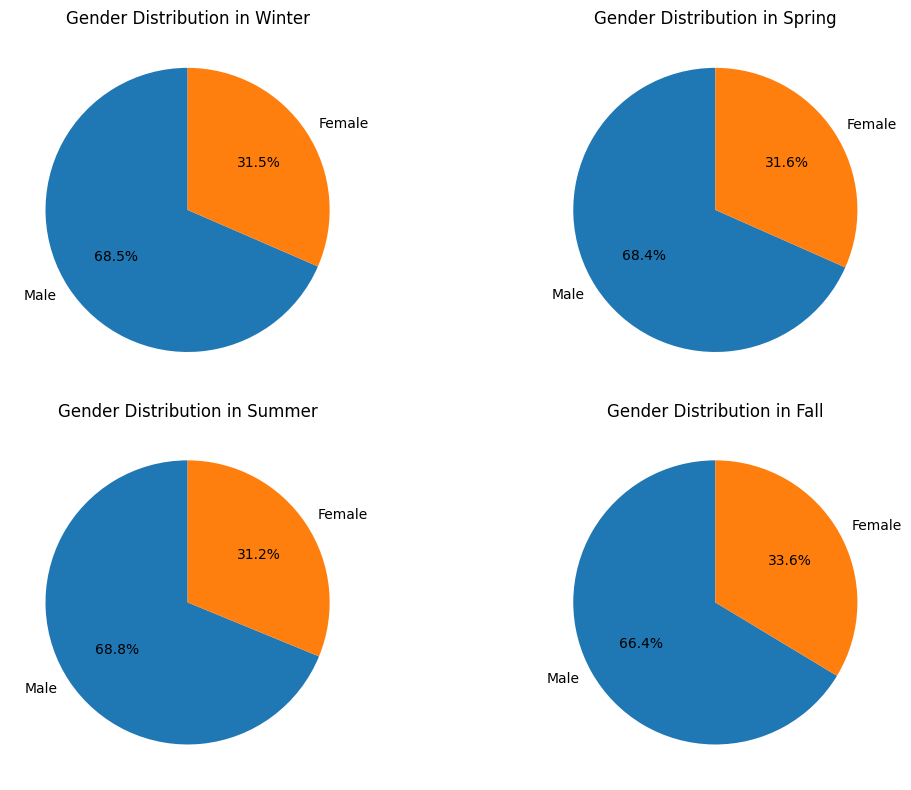

In [ ]:
seasons = df['Season'].unique()
plt.figure(figsize=(12, 8))
for i, season in enumerate(seasons, 1):
    plt.subplot(2, 2, i)
    data = df[df['Season'] == season]['Gender'].value_counts()
    plt.pie(
        data,
        labels=data.index,
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title(f'Gender Distribution in {season}')
plt.tight_layout()
plt.show()

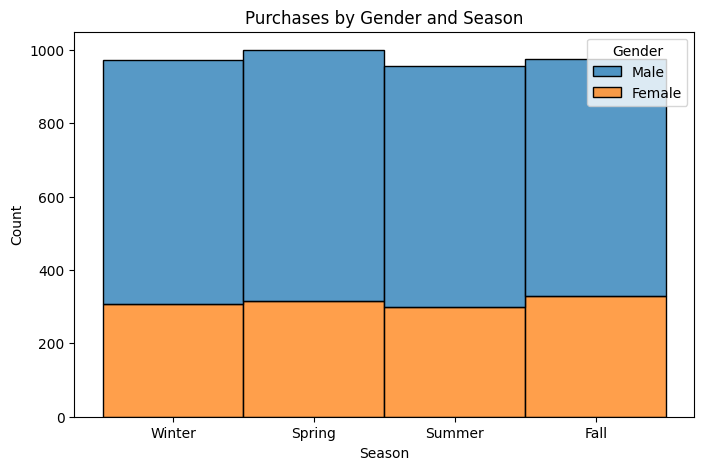

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df,x='Season',hue='Gender',multiple='stack')
plt.title('Purchases by Gender and Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

### Question 4
Create a heatmap showing the correlation between all numeric columns.
- Use `sns.heatmap`.
- Interpret the relationship between `Previous Purchases`, `Purchase Amount`, and `Review Rating`.

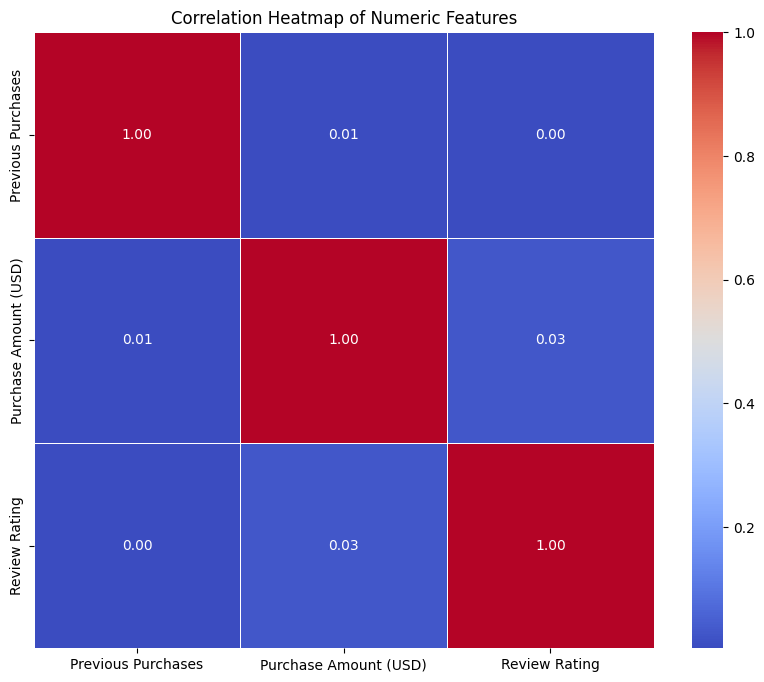

In [ ]:
cols = ['Previous Purchases','Purchase Amount (USD)','Review Rating']
corr = df[cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

### Insight

- There's no any Linear Relation

### Question 5
Create a scatter plot of `Age` vs `Purchase Amount (USD)`, color-coded by `Gender`.
- Use **Matplotlib and Seaborn side-by-side**.
- Add a trend line in Seaborn using `regplot`.

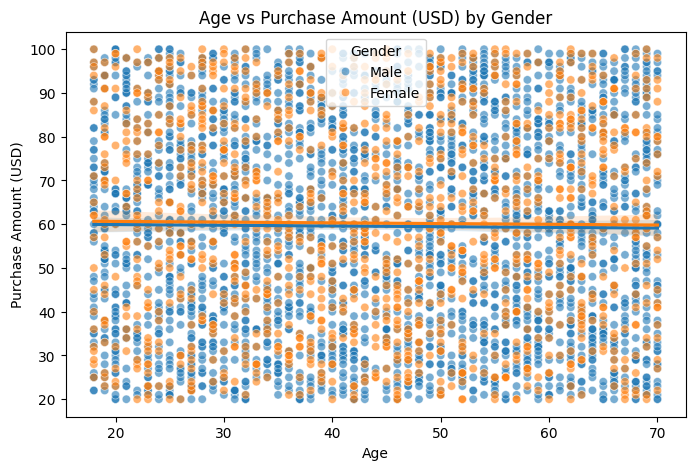

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df,x='Age',y='Purchase Amount (USD)',hue='Gender',alpha=0.6)
for gender in df['Gender'].unique():
    sns.regplot(data=df[df['Gender'] == gender],x='Age',y='Purchase Amount (USD)',scatter=False)
plt.title('Age vs Purchase Amount (USD) by Gender')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.legend(title='Gender')
plt.show()

### Question 6
How does the average review rating differ across different item `Categories` and `Sizes`?
- Use **Seaborn’s heatmap or pivot heatmap** to visualize.
- Use Pandas pivot table to prepare the data.

In [ ]:
import pandas as pd

In [ ]:
pivot_table = pd.pivot_table(df,values='Review Rating',index='Category',columns='Size',aggfunc='mean')
pivot_table

Size,L,M,S,XL
Category,,,,
Accessories,3.736808,3.766192,3.785652,3.819858
Clothing,3.747193,3.692159,3.762676,3.729897
Footwear,3.797093,3.711236,3.865591,3.986567
Outerwear,3.751613,3.693243,3.858929,3.792593


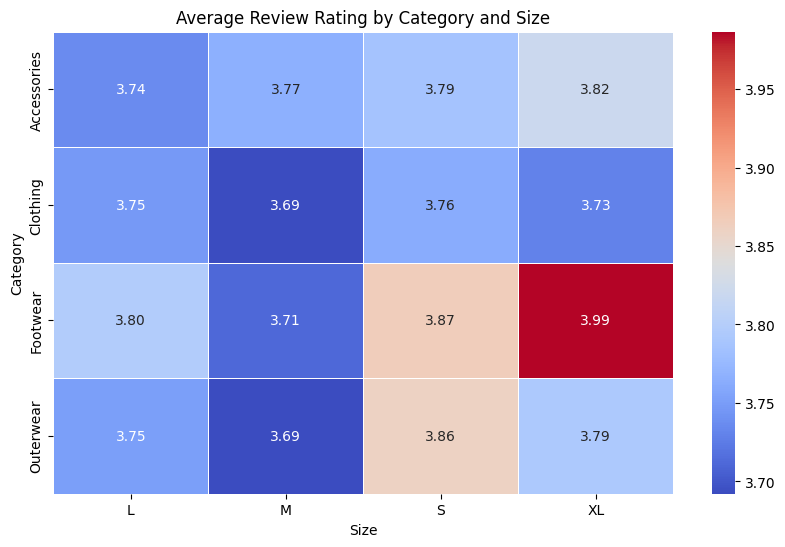

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table,annot=True,fmt='.2f',cmap='coolwarm',linewidths=0.5)
plt.title('Average Review Rating by Category and Size')
plt.xlabel('Size')
plt.ylabel('Category')
plt.show()

### Question 7
Which combinations of `Season` and `Shipping Type` lead to the highest average `Purchase Amount (USD)`?
- Show this as a **grouped bar chart** and as a **heatmap**.

In [ ]:
avg_purchase = df.groupby(['Season', 'Shipping Type'])['Purchase Amount (USD)'].mean().reset_index()

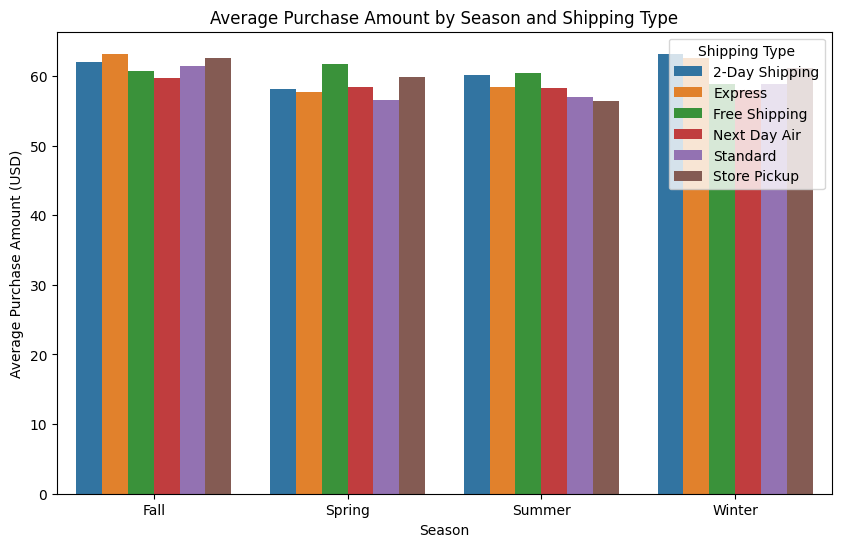

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=avg_purchase, x='Season', y='Purchase Amount (USD)', hue='Shipping Type')
plt.title('Average Purchase Amount by Season and Shipping Type')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

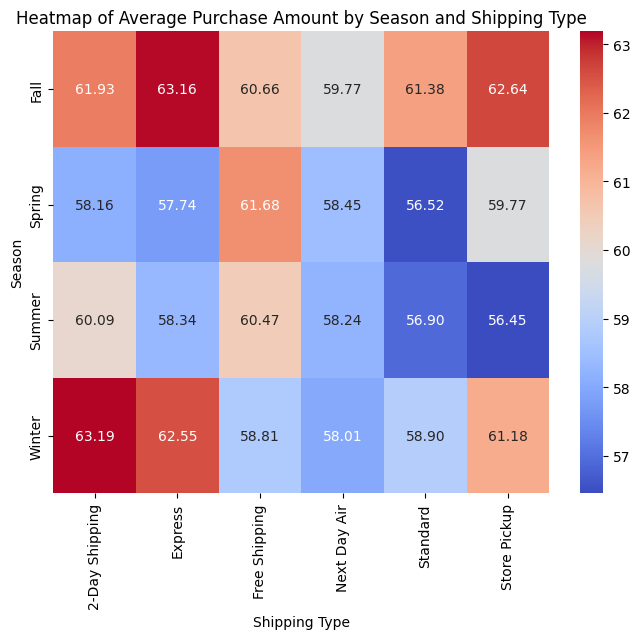

In [ ]:
pivot_table = avg_purchase.pivot(index='Season', columns='Shipping Type', values='Purchase Amount (USD)')
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Heatmap of Average Purchase Amount by Season and Shipping Type')
plt.ylabel('Season')
plt.xlabel('Shipping Type')
plt.show()

### Question 8
Plot a violin plot of `Review Rating` by `Gender` for each `Subscription Status`.
- Use `sns.violinplot` with `hue`.

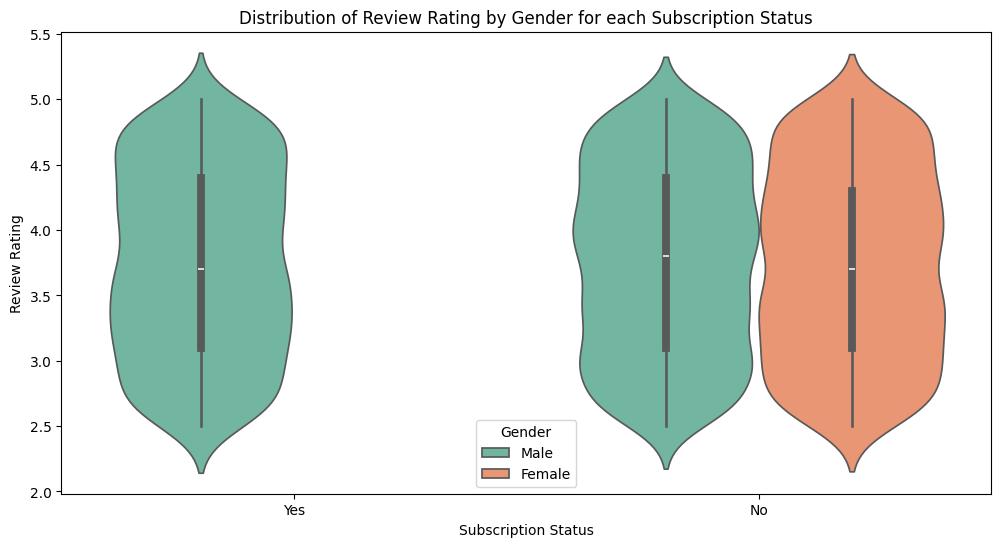

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df, x='Subscription Status', y='Review Rating', hue='Gender',palette='Set2')
plt.title('Distribution of Review Rating by Gender for each Subscription Status')
plt.ylabel('Review Rating')
plt.xlabel('Subscription Status')
plt.legend(title='Gender')
plt.show()

### Question 9
What are the top 5 most purchased `Item Purchased` by total `Purchase Amount`?
- Use Pandas aggregation, plot with **Matplotlib pie and bar** charts.

In [ ]:
top_items = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(5)

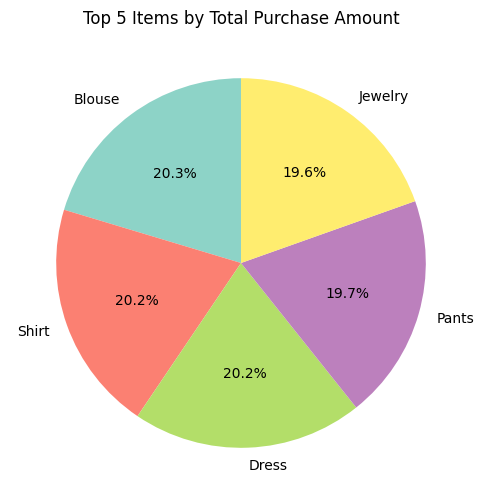

In [ ]:
plt.figure(figsize=(6,6))
top_items.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.ylabel('')
plt.title('Top 5 Items by Total Purchase Amount')
plt.show()

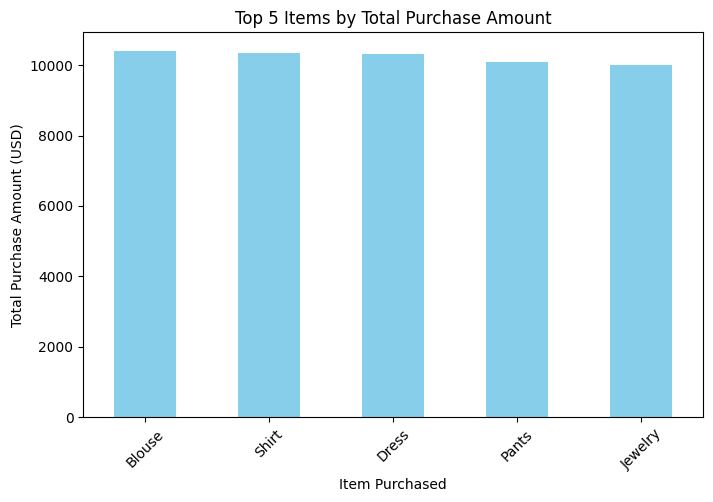

In [ ]:
plt.figure(figsize=(8,5))
top_items.plot.bar(color='skyblue')
plt.ylabel('Total Purchase Amount (USD)')
plt.title('Top 5 Items by Total Purchase Amount')
plt.xticks(rotation=45)
plt.show()

### Question 10
Which `Location` has the highest average `Purchase Amount`, and how does it relate to `Previous Purchases` (plot only top 5 purchase amount location)?
- Use a **Seaborn scatterplot** with size/marker variation.

In [ ]:
avg_purchase = df.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()
top5_locations = avg_purchase.sort_values(by='Purchase Amount (USD)', ascending=False).head(5)['Location']
df_top5 = df[df['Location'].isin(top5_locations)]

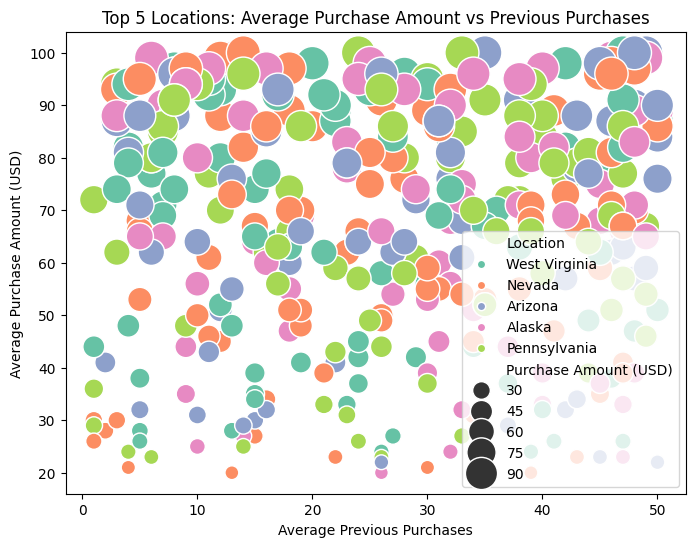

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_top5,x='Previous Purchases',y='Purchase Amount (USD)',size='Purchase Amount (USD)',hue='Location',sizes=(100, 600),palette='Set2')
plt.title('Top 5 Locations: Average Purchase Amount vs Previous Purchases')
plt.xlabel('Average Previous Purchases')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

### Question 11
Using a crosstab, find how `Gender` and `Size` interact.
- Plot using `sns.heatmap`.

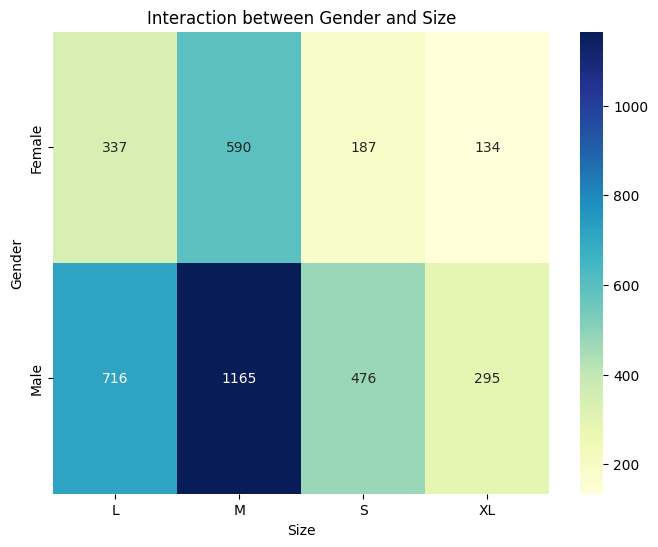

In [ ]:
gender_size_ct = pd.crosstab(df['Gender'], df['Size'])
plt.figure(figsize=(8,6))
sns.heatmap(gender_size_ct, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Interaction between Gender and Size")
plt.ylabel("Gender")
plt.xlabel("Size")
plt.show()

### Question 12
How does the frequency of purchases column influence the use of promo codes?
- Create a **stacked bar chart** using Matplotlib and compare with a **Seaborn countplot**.

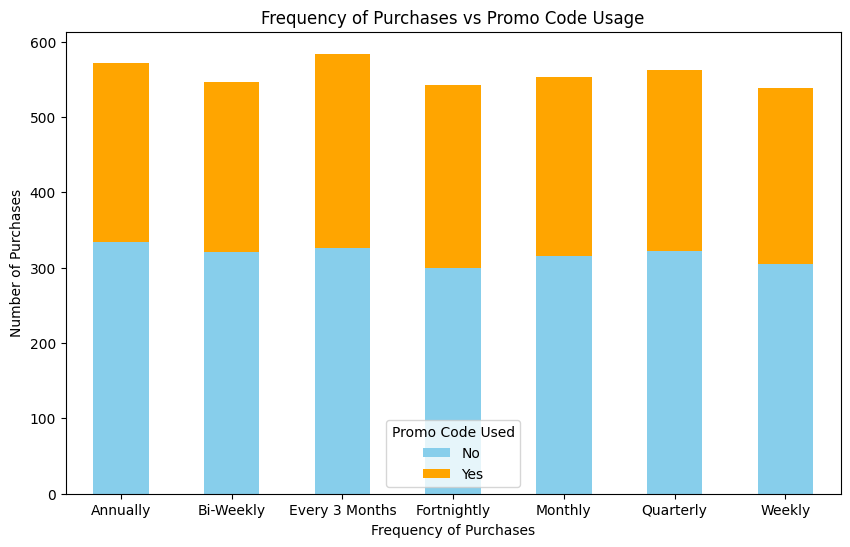

In [ ]:
freq_promo_ct = pd.crosstab(df['Frequency of Purchases'], df['Promo Code Used'])
freq_promo_ct.plot(kind='bar', stacked=True, figsize=(10,6), color=['skyblue', 'orange'])
plt.title("Frequency of Purchases vs Promo Code Usage")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Number of Purchases")
plt.legend(title="Promo Code Used")
plt.xticks(rotation=0)
plt.show()

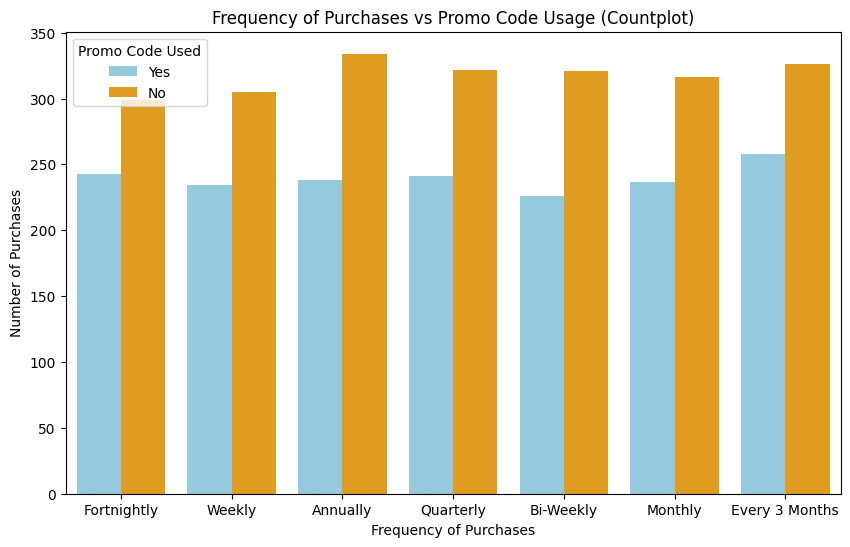

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Frequency of Purchases', hue='Promo Code Used', palette=['skyblue', 'orange'])
plt.title("Frequency of Purchases vs Promo Code Usage (Countplot)")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Number of Purchases")
plt.show()

### Question 13
Using a pairplot, show pairwise relationships between numeric columns segmented by `Gender`.
- Use `sns.pairplot` with `hue="Gender"`.

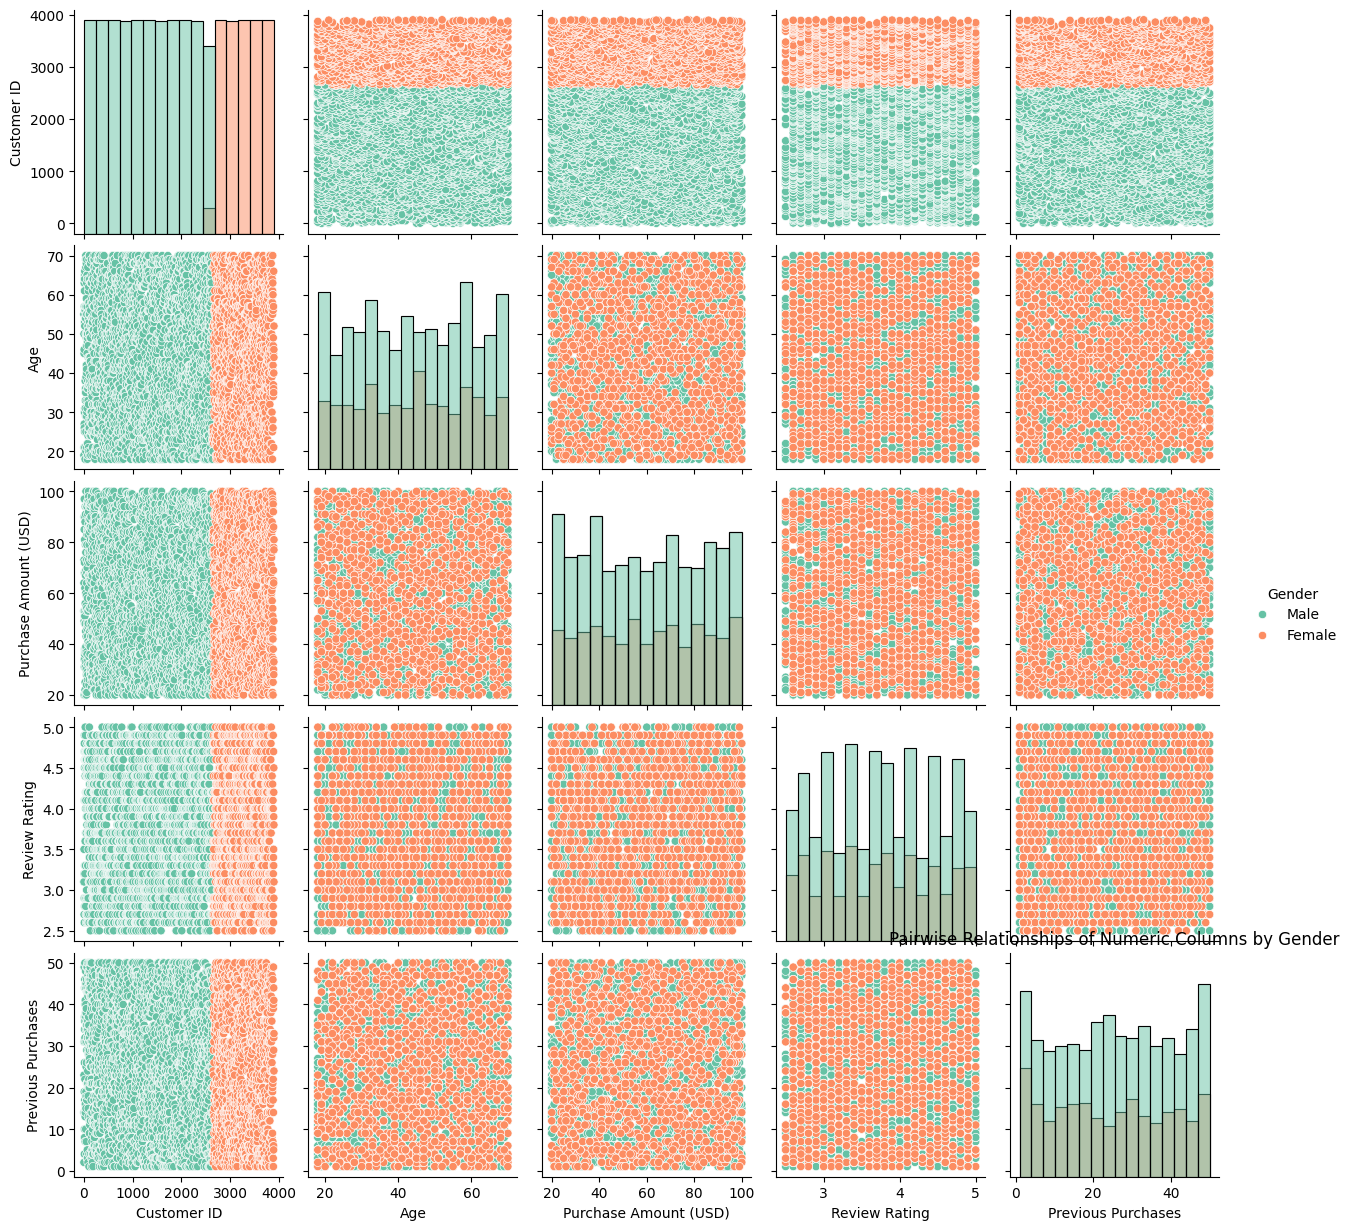

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns
sns.pairplot(df[numeric_cols.tolist() + ['Gender']], hue='Gender', palette='Set2', diag_kind='hist')
plt.title("Pairwise Relationships of Numeric Columns by Gender")
plt.show()